**INTRODUCTION TO THE PROJECT**

**The main objective of this project is to predict whether the user has completed his/her course based on the features provided.**


This dataset captures user engagement metrics from an online course platform, facilitating analyses on factors influencing course completion. It includes user demographics, course-specific data, and engagement metrics.

**Features:**

**UserID**: Unique identifier for each user

**CourseCategory**: Category of the course taken by the user (e.g., Programming, Business, Arts)

**TimeSpentOnCourse**: Total time spent by the user on the course in hours

**NumberOfVideosWatched**: Total number of videos watched by the user

**NumberOfQuizzesTaken**: Total number of quizzes taken by the user

**QuizScores**: Average scores achieved by the user in quizzes (percentage)

**CompletionRate**: Percentage of course content completed by the user

**DeviceType**: Type of device used by the user (Device Type: Desktop (0) or Mobile (1))

**CourseCompletion** (Target Variable):

Course completion status (0: Not Completed, 1: Completed)



**TO PERMIT OUR COLAB NOTEBOOK TO ACCESS THE FILES PRESENT IN THE GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**IMPORTING ALL THE NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df=pd.read_csv('/content/online_course_engagement_data.csv')
df


,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...,...
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1


**EDA(EXPLORATORY DATA ANALYSIS)**

Basic Exploratory Data Analysis (EDA) in machine learning involves the following key steps:

**Understanding the Data:**

Examine the dataset's structure, dimensions, and general information. Check the data types of each feature (numeric, categorical, etc.). Verify if there are any missing values in the dataset.

**Descriptive Statistics:**

Calculate basic summary statistics (mean, median, mode, standard deviation, etc.) for numerical features. Explore the distribution of the target variable.

**Univariate Analysis: **

Analyze individual features in isolation to understand their characteristics. Create histograms, box plots, or frequency distributions for numerical features. Use bar plots for categorical features to visualize their distribution.

**Bivariate Analysis:**

Explore relationships between pairs of features. Use scatter plots for numerical features to identify patterns or correlations. Utilize correlation matrices to quantify the degree of correlation between variables.

**Handling Outliers:**

Identify and examine outliers in the dataset. Decide whether to remove or transform outliers based on domain knowledge and the impact on the model.

**Handling Missing Data:**

Assess the extent of missing values in the dataset. Decide on a strategy to handle missing data (imputation, removal, etc.).

**Feature Engineering:**

Create new features that might enhance the model's predictive power. Convert categorical variables into numerical representations through encoding techniques.

**Data Visualization:**

Use visualizations such as heatmaps, pair plots, or correlation plots to gain insights into the relationships between multiple variables. Addressing Data Imbalances (if applicable):

Check for class imbalances, especially in classification problems, and decide on strategies for handling them.

**Preparing Data for Modeling:**

Split the dataset into training and testing sets. Normalize or standardize numerical features if needed. A thorough EDA provides valuable insights into the characteristics of the data, helping in better feature selection, preprocessing, and ultimately improving the performance of machine learning models.

In [114]:
df.shape

(9000, 9)

In [115]:
df.size

81000

In [113]:
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [ ]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [ ]:
df.dtypes

UserID                     int64
CourseCategory            object
TimeSpentOnCourse        float64
NumberOfVideosWatched      int64
NumberOfQuizzesTaken       int64
QuizScores               float64
CompletionRate           float64
DeviceType                 int64
CourseCompletion           int64
dtype: object

**REMOVING UNWANTED COLUMNS**



In [ ]:
df.pop('UserID')

0       5618
1       4326
2       5849
3       4992
4       3866
        ... 
8995    8757
8996     894
8997    6323
8998    3652
8999    5595
Name: UserID, Length: 9000, dtype: int64

In [ ]:
df

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,Health,29.979719,17,3,50.365656,20.860773,1,0
1,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,Science,35.038427,17,10,59.198853,95.433162,0,1
4,Programming,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...
8995,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,Health,70.048665,13,10,79.655182,72.975225,1,1


**CHECKING FOR THE MISSING VALUES**

In [ ]:
df.isnull().sum()

CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

<Axes: xlabel='CourseCategory', ylabel='NumberOfVideosWatched'>

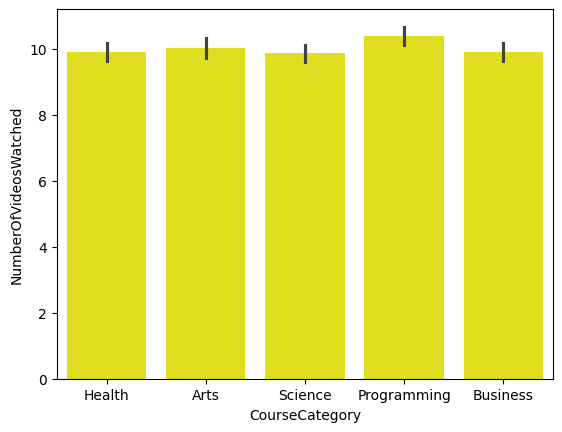

In [116]:
sns.barplot(x=df['CourseCategory'],y=df['NumberOfVideosWatched'],color='yellow')

In [ ]:
px.pie(df,names='CourseCategory')

In [ ]:
df.columns

Index(['CourseCategory', 'TimeSpentOnCourse', 'NumberOfVideosWatched',
       'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'DeviceType',
       'CourseCompletion'],
      dtype='object')

<Axes: xlabel='DeviceType', ylabel='NumberOfVideosWatched'>

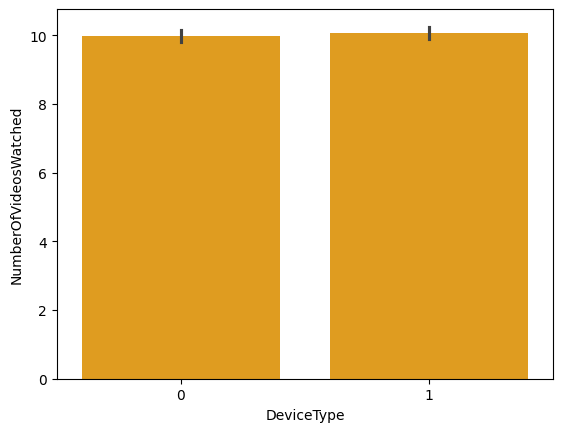

In [ ]:
sns.barplot(x=df['DeviceType'],y=df['NumberOfVideosWatched'],color='orange')

<Axes: xlabel='DeviceType', ylabel='Count'>

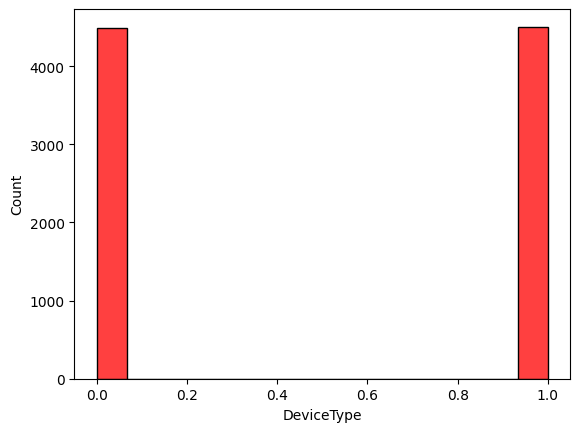

In [117]:
sns.histplot(x=df['DeviceType'],color='red')


<Axes: xlabel='CourseCompletion', ylabel='Count'>

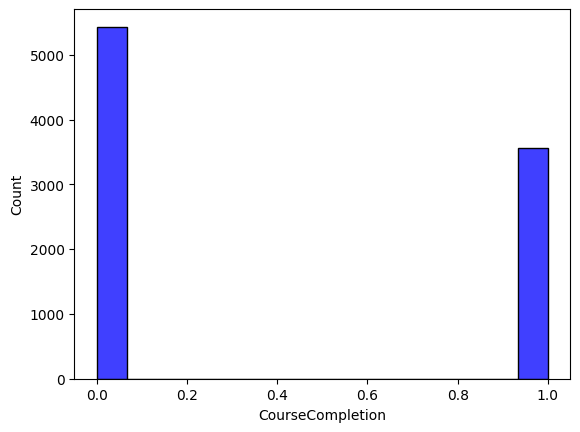

In [121]:
sns.histplot(df['CourseCompletion'],color='blue')

<ipython-input-142-5d72910f9ad9>:1: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.




<Axes: xlabel='CourseCategory', ylabel='NumberOfQuizzesTaken'>

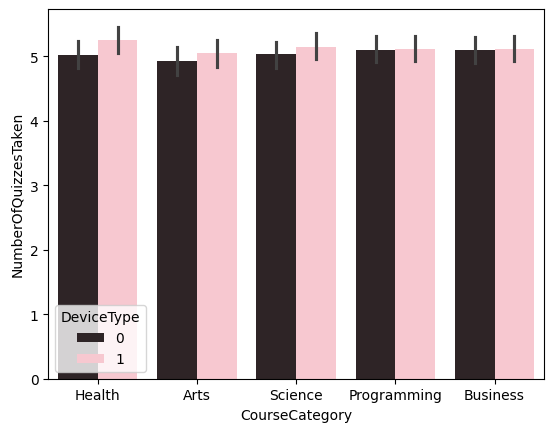

In [142]:
sns.barplot(x=df['CourseCategory'],y=df['NumberOfQuizzesTaken'],color='pink',hue=df['DeviceType'])

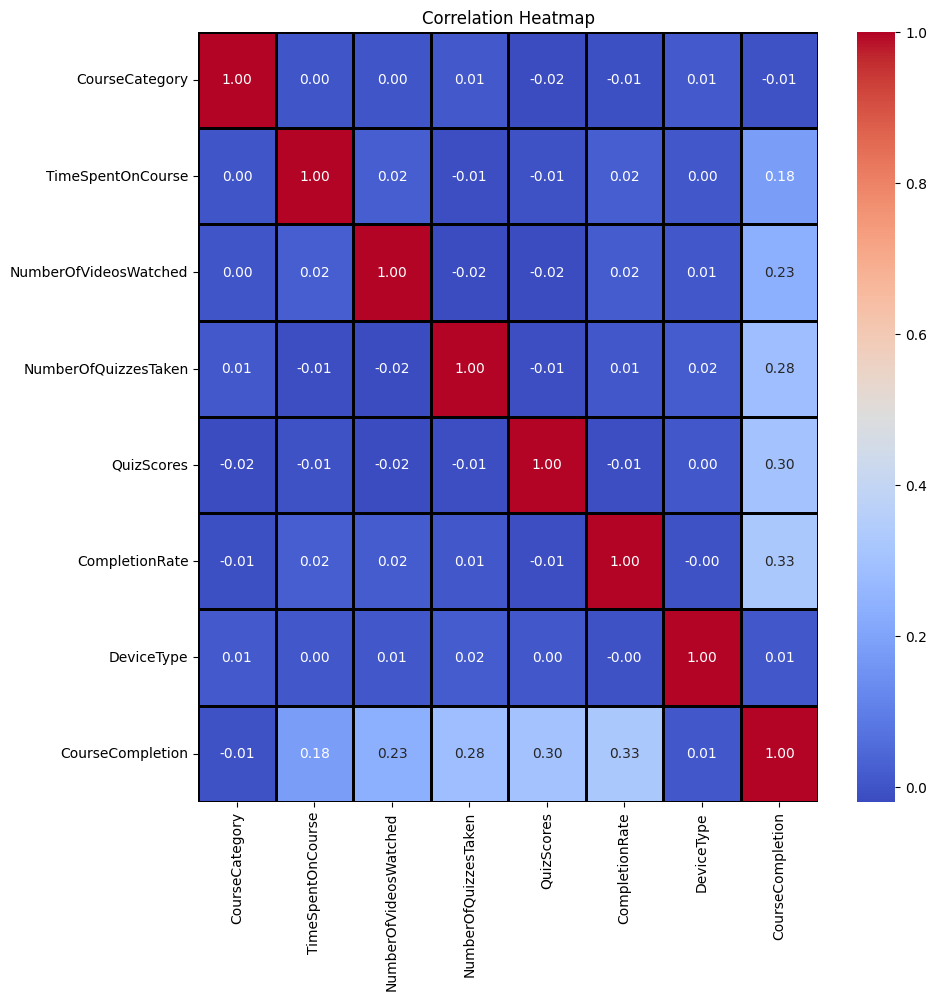

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor= 'black')
plt.title('Correlation Heatmap')
plt.show()

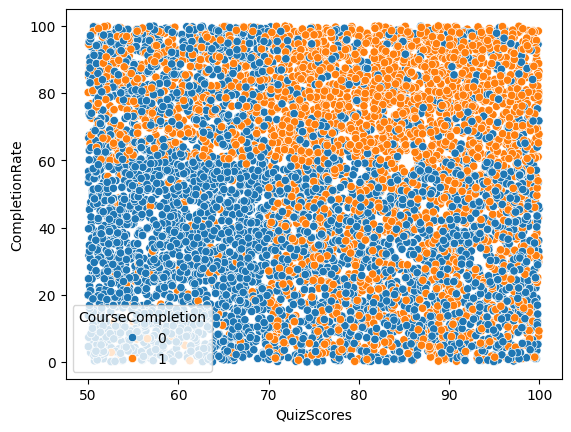

In [ ]:
sns.scatterplot(x='QuizScores',y='CompletionRate',data=df,hue ='CourseCompletion')
plt.show()


**CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['CourseCategory']=le.fit_transform(df['CourseCategory'])
df

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,2,29.979719,17,3,50.365656,20.860773,1,0
1,0,27.802640,1,5,62.615970,65.632415,1,0
2,0,86.820485,14,2,78.458962,63.812007,1,1
3,4,35.038427,17,10,59.198853,95.433162,0,1
4,3,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...
8995,2,37.445225,14,4,54.469359,32.990704,1,0
8996,4,48.631443,7,7,59.413257,0.254625,0,0
8997,2,38.212512,3,3,69.508297,70.188159,1,0
8998,2,70.048665,13,10,79.655182,72.975225,1,1


**SPLITTING THE DATA**

In [ ]:
x=df[['CourseCategory','TimeSpentOnCourse','NumberOfVideosWatched','NumberOfQuizzesTaken','QuizScores','CompletionRate','DeviceType'	]]
y=df['CourseCompletion']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)

(7200, 7)
(1800, 7)


**SCALING THE DATA**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)
print(x_train_scaled)
print(x_test_scaled)


[[-0.72940842 -1.39341295 -0.66091187 ...  0.3484471   0.60505215
  -1.00920907]
 [-0.017308    0.79649444  1.32686219 ...  0.65244242 -0.42062846
   0.99087496]
 [ 1.40689285  0.52094828  1.49251003 ... -0.07876094  1.51142577
   0.99087496]
 ...
 [ 1.40689285  0.77073803 -0.99220755 ... -0.25663197  1.06022676
   0.99087496]
 [-0.72940842 -0.59480007  0.82991868 ... -0.66443311  0.6650102
   0.99087496]
 [ 0.69479243 -0.1926829  -1.6547989  ...  1.57544347  1.37758028
  -1.00920907]]
[[-1.44150885 -1.03780381  0.99556652 ... -1.42505164 -0.05945396
   0.99087496]
 [-1.44150885  1.23253618  0.16732732 ... -1.66620325 -0.12762546
  -1.00920907]
 [-0.72940842  1.71476495  1.16121435 ... -0.63432606  1.43451849
  -1.00920907]
 ...
 [ 0.69479243  0.64401253 -1.15785538 ...  0.22646285 -1.71481335
  -1.00920907]
 [-0.017308    1.01796183  1.65815787 ...  1.35948906  1.64048152
  -1.00920907]
 [-0.017308   -0.38577443 -1.6547989  ...  1.51417083  0.10447751
   0.99087496]]


**CREATING MODELS**

**MODEL 1: LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)


LogisticRegression()

In [ ]:
pred1=lr.predict(x_test_scaled)
pred1

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred1)
cm


array([[916, 165],
       [196, 523]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred1)


0.7994444444444444

**MODEL 2: DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
pred2=dt.predict(x_test_scaled)
pred2

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred2)

0.9283333333333333

**MODEL 3: RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_scaled,y_train)


RandomForestClassifier()

In [ ]:
pred3=rf.predict(x_test_scaled)
pred3

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred3)


0.9694444444444444

**MODEL 4: K NEAREST NEIGHBOR (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
pred4=knn.predict(x_test_scaled)
pred4

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred4)

0.875

**MODEL 5: SUPPORT VECTOR CLASSIFIER (SVC)**

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_scaled,y_train)

SVC()

In [ ]:
pred5=svc.predict(x_test_scaled)
pred5

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred5)

0.8927777777777778

**MODEL 6: XGB CLASSIFIER**

In [ ]:
import xgboost

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred6=xgb.predict(x_test_scaled)
pred6

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
pred_df=pd.DataFrame(pred6)
pred_df

,0
0,0
1,0
2,1
3,1
4,1
...,...
1795,0
1796,0
1797,0
1798,0


In [ ]:
final_df=pd.concat([df,pred_df],axis=1)
final_df

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,0
0,2,29.979719,17,3,50.365656,20.860773,1,0,0.0
1,0,27.802640,1,5,62.615970,65.632415,1,0,0.0
2,0,86.820485,14,2,78.458962,63.812007,1,1,1.0
3,4,35.038427,17,10,59.198853,95.433162,0,1,1.0
4,3,92.490647,16,0,98.428285,18.102478,0,0,1.0
...,...,...,...,...,...,...,...,...,...
8995,2,37.445225,14,4,54.469359,32.990704,1,0,NaN
8996,4,48.631443,7,7,59.413257,0.254625,0,0,NaN
8997,2,38.212512,3,3,69.508297,70.188159,1,0,NaN
8998,2,70.048665,13,10,79.655182,72.975225,1,1,NaN


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred6)

0.965

**COMPARING THE ACCURACIES OF ALL THE MODELS:**

Following are the accuracy scores of all the models-

Logistic regression:   79%

Decision tree:         92%

Random forest:         96%

KNN:                   87%

SVC:                   89%

XGB:                   96%


In [128]:
model={'Model_Type':['Logistic_reg','Decision_tr','Random_for','KNN','SVC','XGB'],
       'Accuracy':[79,92,96,87,89,96]}
df1=pd.DataFrame(model)
df1

,Model_Type,Accuracy
0,Logistic_reg,79
1,Decision_tr,92
2,Random_for,96
3,KNN,87
4,SVC,89
5,XGB,96


<Axes: xlabel='Model_Type', ylabel='Accuracy'>

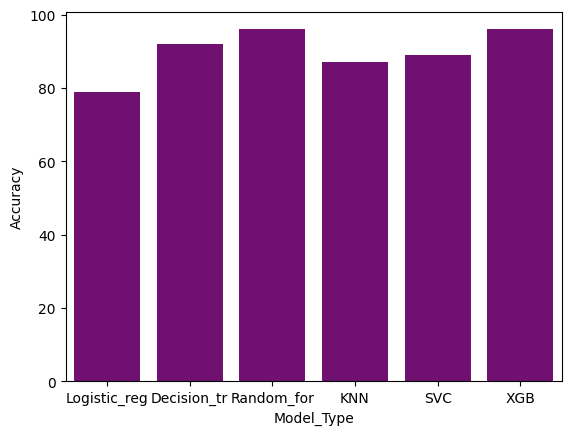

In [140]:
sns.barplot(x=df1['Model_Type'],y=df1['Accuracy'],color='purple')

**CONCLUSION:**

**From the above values we can clearly conclude that random forest classifier and XGB classifier are the best models for this project.**